# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [2]:
def fill_na(df,col):
    df[col] = df[col].fillna('NA')
    return df

In [3]:
def fill_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df

In [4]:
def fill_mode(df, col):
    df[col].fillna(df[col].mode()[0],inplace = True)
    return df

In [5]:
def fill_random_values(df, col):
   
    # extract a random sample
    random_sample_df = df[col].dropna().sample(df[col].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
    random_sample_df.index = df[df[col].isnull()].index

    # replace the NA
    df.loc[df[col].isnull(), col] = random_sample_df

    return df

# Reading the data and retrieving basic information

In [6]:
vehicles = pd.read_csv('vehicles.csv')

In [7]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [9]:
vehicles.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
vehicles = vehicles.drop(['county','size','lat','long','url','region_url','image_url','id','posting_date'],axis = 1)

In [11]:
vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,description,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


# Dropping rows which have more than 6 null column values 

In [12]:
# most of the values in a row are null and can be removed
null_values = vehicles.isna().sum(axis=1) >= 7
null_values[null_values==True]

0         True
1         True
2         True
3         True
4         True
          ... 
426840    True
426841    True
426842    True
426843    True
426846    True
Length: 5039, dtype: bool

In [13]:
vehicles_df = vehicles.dropna(thresh = len(vehicles.columns) - 6)

In [14]:
vehicles_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,description,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al


# Converting year from float to string

In [15]:
vehicles_df['year'] = vehicles_df['year'].astype(str).str[:4] 

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\1315355259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_df['year'] = vehicles_df['year'].astype(str).str[:4]


# Checking the percentage of null values in each column

In [16]:
null_percentage = vehicles_df.isnull().mean()*100

In [17]:
null_percentage

region           0.000000
price            0.000000
year             0.000000
manufacturer     3.438262
model            0.932105
condition       40.078845
cylinders       40.932484
fuel             0.524605
odometer         0.889198
title_status     1.765831
transmission     0.442110
VIN             37.148594
drive           29.757420
type            20.820404
paint_color     29.675399
description      0.000237
state            0.000000
dtype: float64

# Filling the columns with null values using mean,mode, NA and random values depending on the type of the column(numerical/categorical)

In [18]:
cols = ['VIN', 'description']
for col in cols:
    vehicles_df = fill_na(vehicles_df,col)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\3823704471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('NA')


In [19]:
cols = ['odometer']
for col in cols:
    vehicles_df = fill_median(vehicles_df,col)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\4158722417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [20]:
cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission','year']
for col in cols:
    vehicles_df = fill_mode(vehicles_df,col)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\2455609439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0],inplace = True)


In [21]:
cols = ['drive','type','paint_color', 'condition', 'cylinders']
for col in cols:
    vehicles_df = fill_random_values(vehicles_df,col)

# Getting insights on the cleaned dats

In [22]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421841 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        421841 non-null  object 
 1   price         421841 non-null  int64  
 2   year          421841 non-null  object 
 3   manufacturer  421841 non-null  object 
 4   model         421841 non-null  object 
 5   condition     421841 non-null  object 
 6   cylinders     421841 non-null  object 
 7   fuel          421841 non-null  object 
 8   odometer      421841 non-null  float64
 9   title_status  421841 non-null  object 
 10  transmission  421841 non-null  object 
 11  VIN           421841 non-null  object 
 12  drive         421841 non-null  object 
 13  type          421841 non-null  object 
 14  paint_color   421841 non-null  object 
 15  description   421841 non-null  object 
 16  state         421841 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 57

In [23]:
vehicles_df.describe()

,price,odometer
count,4.218410e+05,4.218410e+05
mean,7.096658e+04,9.726946e+04
std,1.206342e+07,2.036933e+05
min,0.000000e+00,0.000000e+00
25%,5.988000e+03,3.812300e+04
50%,1.399100e+04,8.542700e+04
75%,2.659000e+04,1.330000e+05
max,3.736929e+09,1.000000e+07


# Visualizing the data to figure out the outliers

Text(0, 0.5, 'price')

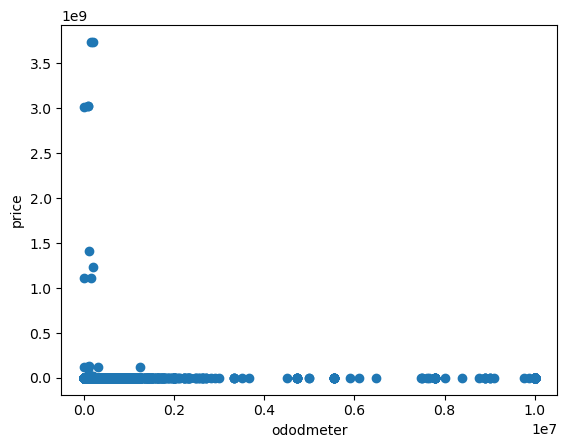

In [24]:
plt.scatter(vehicles_df['odometer'],vehicles_df['price'])
plt.xlabel('ododmeter')
plt.ylabel('price') 

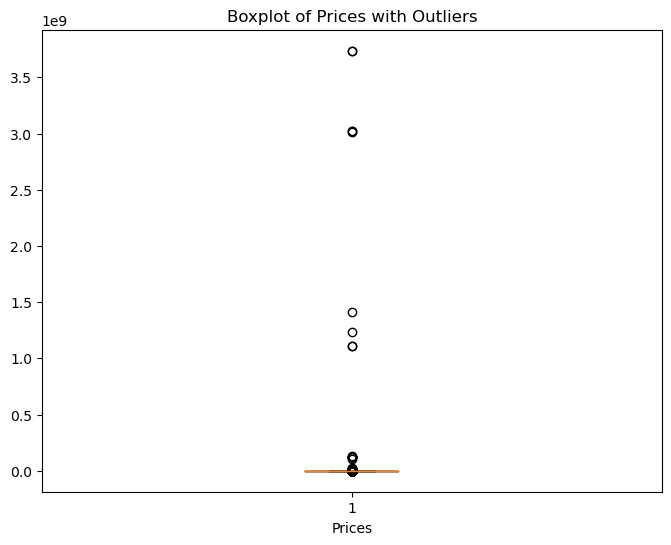

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(vehicles_df['price'])
plt.xlabel('Prices')
plt.title('Boxplot of Prices with Outliers')
plt.show()

In [26]:
len(vehicles_df)

421841

In [27]:
price_ge_1000000 = vehicles_df[vehicles_df['price'] >= 1000000]

In [28]:
len(price_ge_1000000)

42

In [29]:
price_eq_0 = vehicles_df[vehicles_df['price'] == 0]

In [30]:
len(price_eq_0)

31791

In [31]:
vehicles_df.drop(price_eq_0.index,inplace = True)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\923952015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_df.drop(price_eq_0.index,inplace = True)


In [32]:
vehicles_df.drop(price_ge_1000000.index,inplace = True)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13092\3226164524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_df.drop(price_ge_1000000.index,inplace = True)


In [33]:
vehicles_df.to_csv('clean_vehicles_data.csv', index=False)